In [1]:
import numpy as np
import pandas as pd
import os
import glob
# %matplotlib notebook
import seaborn as sns
import random
import matplotlib.pyplot as plt

/home/acamassa/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def split_and_modify(s):
    parts = s.split('NDAR')
    # Modify parts if necessary, here we just join them with a space
    modified_string = 'NDAR_'+parts[1]
    return modified_string


In [3]:
outliers_df = pd.read_csv('/cnl/abcd/data/imaging/fmri/rsfmri/processed/ddc_qc_flat_outliers.csv', index_col=0) 
feat_df=outliers_df[outliers_df['outlier']==0]
feat_df.reset_index(inplace=True)

In [4]:
# Apply the function to column 'a'
feat_df['subject'] = feat_df['subject'].apply(split_and_modify)
feat_df = feat_df.rename(columns={'subject': 'subjectkey'})
feat_df.head()

/tmp/ipykernel_2539617/3624171277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feat_df['subject'] = feat_df['subject'].apply(split_and_modify)


subjectkey          0          1          2          3          4  \
0  NDAR_INVW1J6282F -244.88968 -221.16660   68.01213 -266.67619 -122.12761   
1  NDAR_INVW1J6282F  102.16184 -505.50059  314.19757 -238.82883   61.95173   
2  NDAR_INVW1J6282F  128.95522   45.14835   33.03195  160.16217    3.68817   
3  NDAR_INVW1J6282F  -80.04268  -25.13595   29.28588   24.43775  -19.50383   
4  NDAR_INVW26YNDL9  131.58412  145.94067  112.29172 -100.09851    1.56761   

           5          6          7          8  ...       7561      7562  \
0   48.88834 -127.88639 -347.25771 -133.42113  ...  -29.06947  26.92065   
1  312.22469 -134.67879 -109.60544 -288.29126  ... -113.09015 -35.65692   
2  138.47686   12.63667  -81.98389  376.57302  ...  236.29328 -80.26281   
3   -5.19565  -21.31558  -14.61975   36.99132  ...   19.36923  72.82719   
4  -17.21341 -223.34589 -107.02514  119.50962  ...   49.92237 -35.02470   

        7563       7564      7565      7566      7567       7568  run  outlier  
0   28.83137  -35.98238 -26.62823  21.91314 -27.16582  -35.82714    2        0  
1 -264.05862  -14.65260  54.51745   9.18767 -91.51436  -40.21116    1        0  
2  -30.87745  -25.29452   3.38577 -41.03657  -5.91495   57.99728    4        0  
3   87.19510 -109.96719  -9.79359 -30.26235 -34.02686   45.39575    3        0  
4   42.61021 -145.04887  78.45287  44.43082   7.00536  126.49908    1        0  

[5 rows x 7572 columns]

Text(0.5, 1.0, 'N=16287 runs from N=6615 subjects std FC')

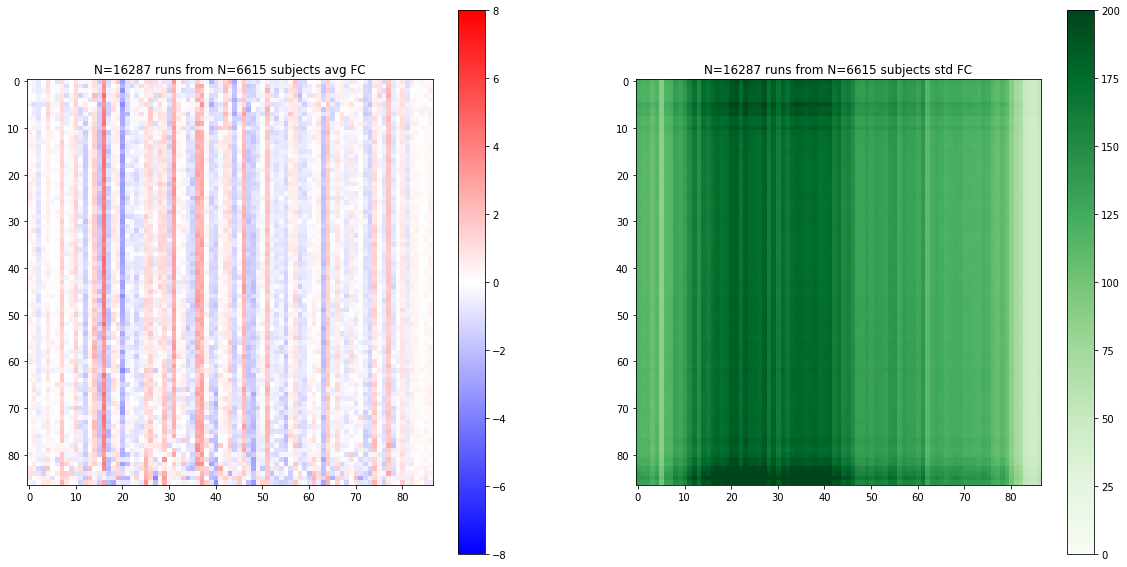

In [5]:
FC=feat_df.drop(columns=['subjectkey','run','outlier'])
avg_FC=FC.mean(axis=0)
avg_FC=avg_FC.values.reshape([87,87])
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.imshow(avg_FC,cmap='bwr')
plt.colorbar()
plt.clim([-8,8])
plt.title(f"N={len(FC)} runs from N={len(np.unique(feat_df['subjectkey']))} subjects avg FC")

std_FC=FC.std(axis=0)
std_FC=std_FC.values.reshape([87,87])
plt.subplot(122)
plt.imshow(std_FC,cmap='Greens')
plt.colorbar()
plt.clim([0,200])
plt.title(f"N={len(FC)} runs from N={len(np.unique(feat_df['subjectkey']))} subjects std FC")

In [6]:
info = pd.read_csv('/cnl/abcd/data/tabular/raw/abcd_cbcl01.txt', delimiter='\t',low_memory=False)
info=info[['subjectkey', 'sex','interview_age']][1:]

In [7]:
female_subjects = info.loc[info['sex'] == 'F', 'subjectkey']
male_subjects = info.loc[info['sex'] == 'M', 'subjectkey']

females = feat_df[feat_df['subjectkey'].isin(female_subjects)].drop(columns=['subjectkey','run','outlier'])
males = feat_df[feat_df['subjectkey'].isin(male_subjects)].drop(columns=['subjectkey','run','outlier'])


In [8]:
print(f"Males N={len(male_subjects)}, Females N={len(female_subjects)}")

Males N=20816, Females N=18950


(array([7.000e+00, 1.200e+01, 1.010e+02, 6.190e+02, 4.785e+03, 2.454e+03,
        2.970e+02, 4.500e+01, 1.100e+01, 4.000e+00]),
 array([-929.01606 , -736.569381, -544.122702, -351.676023, -159.229344,
          33.217335,  225.664014,  418.110693,  610.557372,  803.004051,
         995.45073 ]),
 <BarContainer object of 10 artists>)

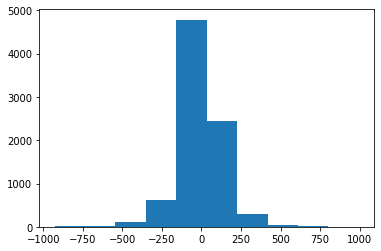

In [28]:
# normality test
from scipy import stats
x=np.asarray(females)[:,2746]
y=np.asarray(males)[:,2746]
res = stats.normaltest(x)
res.pvalue

plt.figure()
plt.hist(x)

In [27]:
stats.kstest(x,  "norm", alternative='less')

KstestResult(statistic=0.47959437895801527, pvalue=0.0)

In [11]:
hand = pd.read_csv('/cnl/abcd/data/tabular/raw/abcd_ehis01.txt', delimiter='\t')
hand=hand[['subjectkey','ehi_y_ss_scoreb']]

In [ ]:
# #using overall handedness score
# right_subjects = hand.loc[hand['ehi_y_ss_scoreb'] == '1', 'subjectkey']
# left_subjects = hand.loc[hand['ehi_y_ss_scoreb'] == '2', 'subjectkey']
# mix_subjects = hand.loc[hand['ehi_y_ss_scoreb'] == '3', 'subjectkey']

# right = feat_df[feat_df['subjectkey'].isin(right_subjects)].drop(columns=['subjectkey','run','outlier'])
# left = feat_df[feat_df['subjectkey'].isin(left_subjects)].drop(columns=['subjectkey','run','outlier'])
# mix = feat_df[feat_df['subjectkey'].isin(mix_subjects)].drop(columns=['subjectkey','run','outlier'])

# print(f"Right N={len(right_subjects)}, Left N={len(left_subjects)}, Mixed N={len(mix_subjects)}")

In [61]:
hand = pd.read_csv('/cnl/abcd/data/tabular/raw/abcd_ehis01.txt', delimiter='\t')
hand=hand[['subjectkey','ehi1b']][1:]
hand['ehi1b']=hand['ehi1b'].astype(float)

In [62]:
# using writing handedness
right_subjects = hand.loc[hand['ehi1b'] >0, 'subjectkey']
left_subjects = hand.loc[hand['ehi1b'] <0, 'subjectkey']
mix_subjects = hand.loc[hand['ehi1b'] == 0, 'subjectkey']

right = feat_df[feat_df['subjectkey'].isin(right_subjects)].drop(columns=['subjectkey','run','outlier'])
left = feat_df[feat_df['subjectkey'].isin(left_subjects)].drop(columns=['subjectkey','run','outlier'])
mix = feat_df[feat_df['subjectkey'].isin(mix_subjects)].drop(columns=['subjectkey','run','outlier'])

print(f"Right N={len(right_subjects)}, Left N={len(left_subjects)}, Mixed N={len(mix_subjects)}")

Right N=10501, Left N=1322, Mixed N=48


Text(0.5, 1.0, 'MixHand std FC')

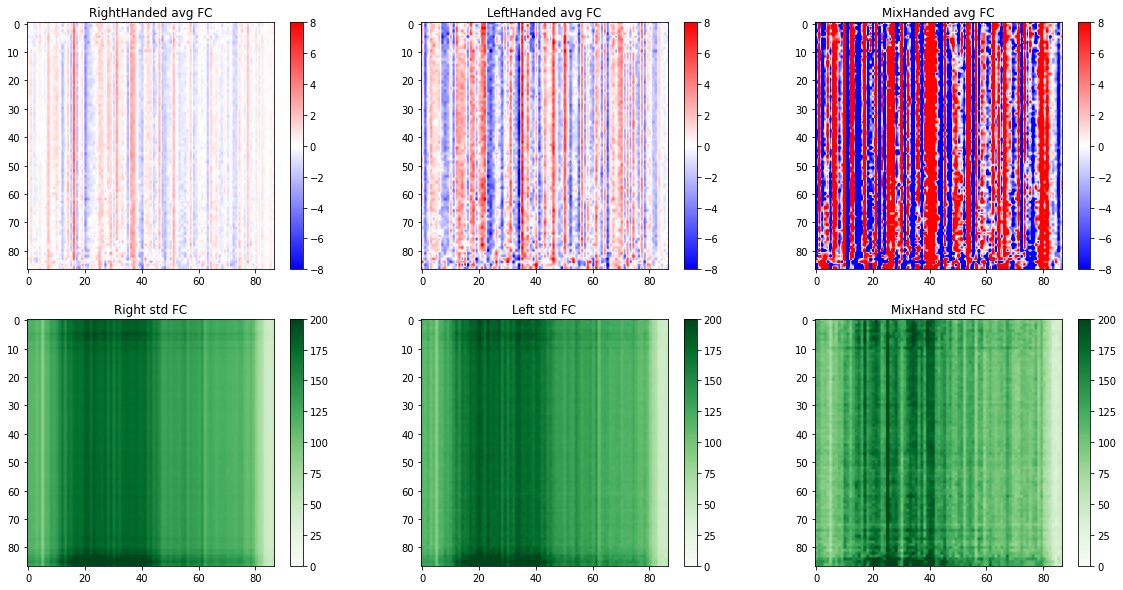

In [23]:
plt.figure(figsize=(20,10))
plt.subplot(231)
R_avg_FC=right.mean(axis=0)
R_avg_FC=R_avg_FC.values.reshape([87,87])
plt.imshow(R_avg_FC,cmap='bwr')
plt.colorbar()
plt.clim([-8,8])
plt.title('RightHanded avg FC')
plt.subplot(232)
L_avg_FC=left.mean(axis=0)
L_avg_FC=L_avg_FC.values.reshape([87,87])
plt.imshow(L_avg_FC,cmap='bwr')
plt.clim([-8,8])
plt.colorbar()
plt.title('LeftHanded avg FC')
plt.subplot(233)
Mix_avg_FC=mix.mean(axis=0)
Mix_avg_FC=Mix_avg_FC.values.reshape([87,87])
plt.imshow(Mix_avg_FC,cmap='bwr')
plt.clim([-8,8])
plt.colorbar()
plt.title('MixHanded avg FC')


plt.subplot(234)
R_std_FC=right.std(axis=0)
R_std_FC=R_std_FC.values.reshape([87,87])
plt.imshow(R_std_FC,cmap='Greens')
plt.colorbar()
plt.clim([0,200])
plt.title('Right std FC')
plt.subplot(235)
L_std_FC=left.std(axis=0)
L_std_FC=L_std_FC.values.reshape([87,87])
plt.imshow(L_std_FC,cmap='Greens')
plt.clim([0,200])
plt.colorbar()
plt.title('Left std FC')
plt.subplot(236)
Mix_std_FC=mix.std(axis=0)
Mix_std_FC=Mix_std_FC.values.reshape([87,87])
plt.imshow(Mix_std_FC,cmap='Greens')
plt.clim([0,200])
plt.colorbar()
plt.title('MixHand std FC')

Text(0.5, 1.0, 'Males std FC')

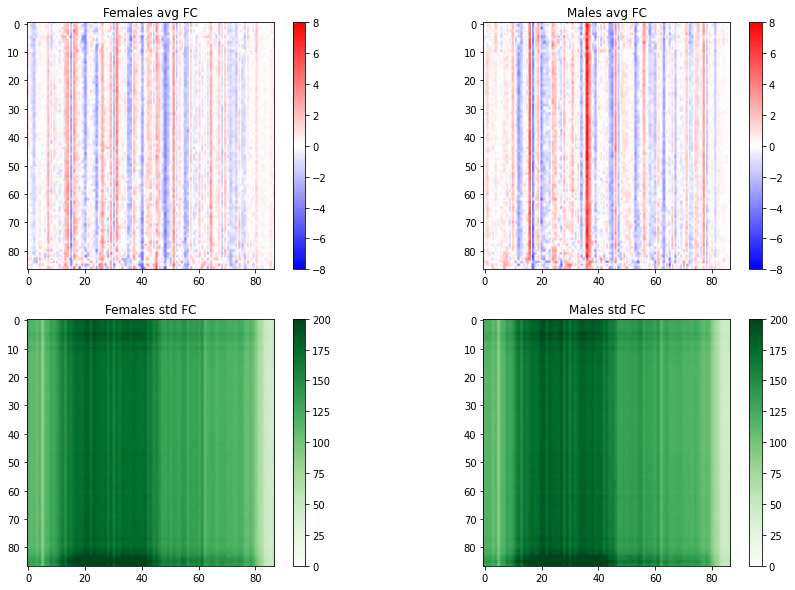

In [67]:
plt.figure(figsize=(15,10))
plt.subplot(221)
F_avg_FC=females.mean(axis=0)
F_avg_FC=F_avg_FC.values.reshape([87,87])
plt.imshow(F_avg_FC,cmap='bwr')
plt.colorbar()
plt.clim([-8,8])
plt.title('Females avg FC')
plt.subplot(222)
M_avg_FC=males.mean(axis=0)
M_avg_FC=M_avg_FC.values.reshape([87,87])
plt.imshow(M_avg_FC,cmap='bwr')
plt.clim([-8,8])
plt.colorbar()
plt.title('Males avg FC')
plt.subplot(223)
F_std_FC=females.std(axis=0)
F_std_FC=F_std_FC.values.reshape([87,87])
plt.imshow(F_std_FC,cmap='Greens')
plt.colorbar()
plt.clim([0,200])
plt.title('Females std FC')
plt.subplot(224)
M_std_FC=males.std(axis=0)
M_std_FC=M_std_FC.values.reshape([87,87])
plt.imshow(M_std_FC,cmap='Greens')
plt.clim([0,200])
plt.colorbar()
plt.title('Males std FC')

Text(0, 0.5, 'ROI #')

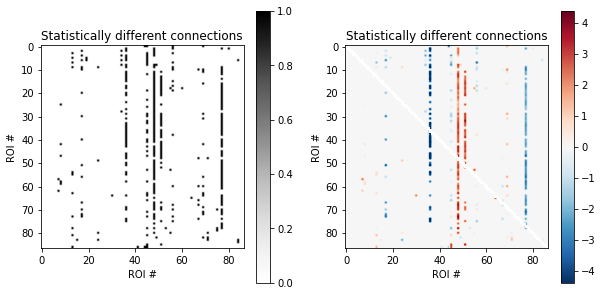

In [83]:
from scipy.stats import ttest_ind, mannwhitneyu
stat_diff = np.zeros(87 * 87)
ttest=1
median=0


t_statistics = np.zeros((np.shape(males)[1], 1))
p_values = np.zeros((np.shape(males)[1], 1))

for i in range(np.shape(males)[1]):
    # res = stats.normaltest(males.values[:, i])
    
    # if res.pvalue<0.005:
    # # if ttest:
    #     t_statistics[i], p_values[i] = ttest_ind(
    #         males.values[:, i], females.values[:, i]
    #     )
    # else:
    t_statistics[i], p_values[i] = mannwhitneyu(males.values[:, i], females.values[:, i])

p = p_values.reshape((87 * 87))
stat_diff[np.where(p < 0.05)[0]] = 1

stat_diff = np.reshape(stat_diff, (87, 87))

if median:
    a = np.nanmedian(males, axis=0)
    b = np.nanmedian(females, axis=0)
else:
    a = np.nanmean(males, axis=0)
    b = np.nanmean(females, axis=0)



# diff = b - a
#females - males
diff = abs(b) - abs(a)
diff = np.reshape(diff, (87, 87))
diff[np.where(stat_diff == 0)] = 0

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(stat_diff, cmap="Greys")
plt.clim([0, 1])
plt.colorbar()
plt.title("Statistically different connections")
plt.xlabel("ROI #")
plt.ylabel("ROI #")
plt.subplot(122)
im = plt.imshow(diff, cmap="RdBu_r")
for i in range(len(diff)):
    im.axes.add_patch(
        plt.Rectangle((i - 0.5, i - 0.5), 1, 1, fill=True, color="w")
    )
plt.clim([-np.max(diff), np.max(diff)])
plt.colorbar()
plt.title("Statistically different connections")
plt.xlabel("ROI #")
plt.ylabel("ROI #")

# pv = np.reshape(p, (self.n_roi, self.n_roi))
# p_table_list = []
# for i in range(self.n_roi):
#     for j in range(self.n_roi):
#         new_row = {
#             "Areas": self.all_ROIs[i] + "-" + self.all_ROIs[j],
#             "p-value": pv[i, j],
#         }
#         p_table_list.append(new_row)


In [50]:
import pickle
os.chdir('/home/acamassa/ABCD/DDC/src/abcd_ddc/')
# # Load the variable from the pickle file
with open('all_ROIsFC.pkl', 'rb') as f:
    all_ROIsFC = pickle.load(f)

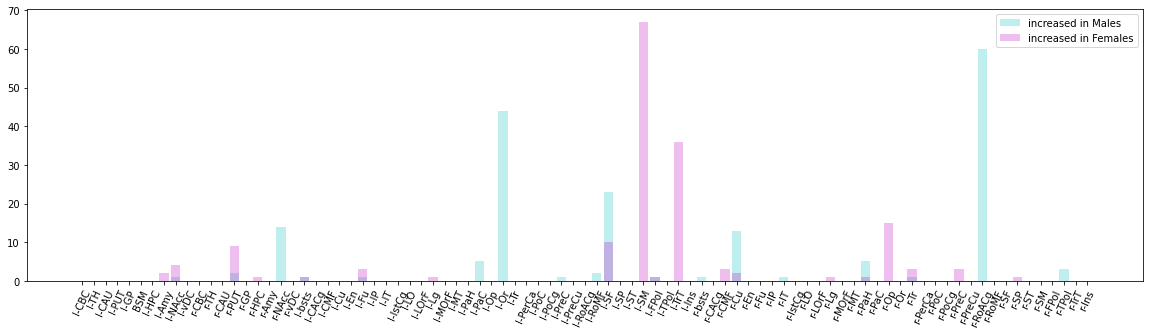

In [84]:
# the histograms shows how many connections from a certain area
# are stronger in males
# or females subjects

#females - males
fig, ax = plt.subplots(figsize = (20,5))
ax.bar(np.arange(87),np.sum(diff<0, axis=0), color='c', alpha = 0.25, label='increased in Males')

ax.bar(np.arange(87),np.sum(diff>0, axis=0), color='m',  alpha = 0.25, label='increased in Females')
ax.set_xticks(np.arange(0,87))
ax.set_xticklabels(all_ROIsFC, rotation=65)
# ax.set_title('Areas with connectivity increased in Females')
plt.legend()

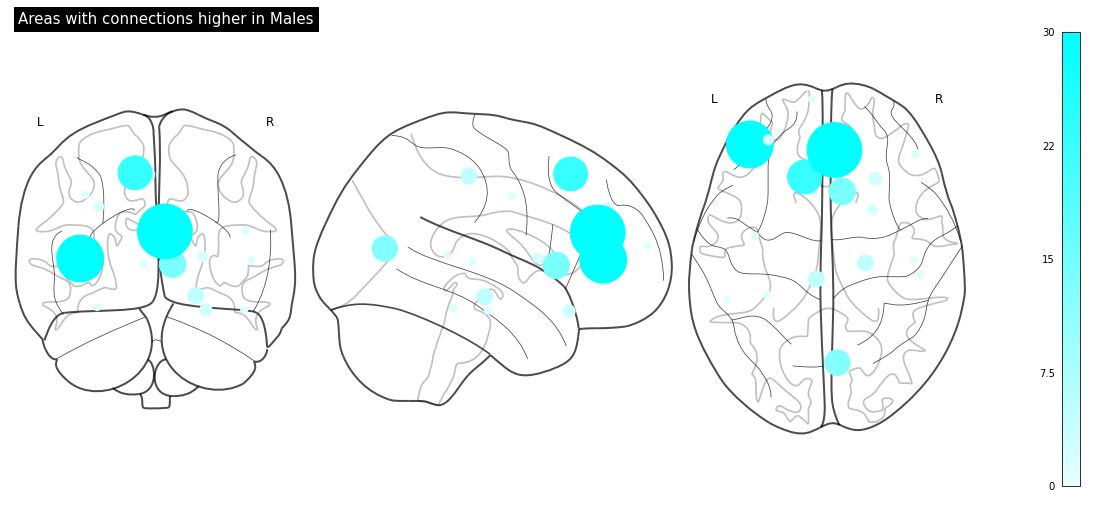

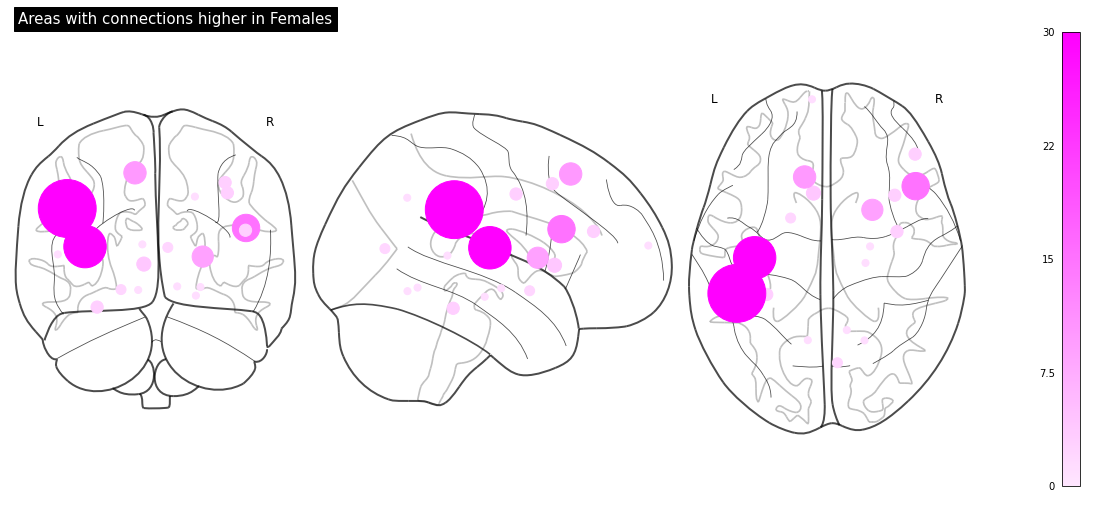

In [101]:
from nilearn import plotting
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

fig_dir = "/home/acamassa/ABCD/DDC_figures/baseline/"
# Load the variable from the pickle file
os.chdir(fig_dir)
rows_to_remove = [0,1,2,3,9, 10, 14,17,18,19,20]
columns_to_remove = [0,1,2,3,9, 10, 14,17,18,19,20]

with open('coord_list.pickle', 'rb') as f:
    coord_list = pickle.load(f)

coord_list = np.delete(coord_list, rows_to_remove, axis=0)

# Define colors
light_cyan = (0.9, 1.0, 1.0)
cyan = (0.0, 1.0, 1.0)
cmap = LinearSegmentedColormap.from_list("light_to_cyan", [light_cyan, cyan])

# Create an exampl

fig1=plt.figure(figsize=(15,7))
plotting.plot_markers(
    np.sum(diff<0, axis=0),
    coord_list,
    node_cmap=cmap,
    figure=fig1,
    # node_vmin=-2e-18,
    alpha=1,
    node_vmax=30,
    node_size=np.sum(diff<0, axis=0)*50,
    title="Areas with connections higher in Males",
)
# Define colors
light_magenta = (1.0, 0.9, 1.0)
magenta = (1.0, 0.0, 1.0)

# Create a custom colormap
cmap = LinearSegmentedColormap.from_list("light_to_magenta", [light_magenta, magenta])
fig2=plt.figure(figsize=(15,7))
plotting.plot_markers(
    np.sum(diff>0, axis=0),
    coord_list,
    node_cmap=cmap,
    figure=fig2,
    # node_vmin=-2e-18,
    alpha=1,
    node_vmax=30,
    node_size=np.sum(diff>0, axis=0)*50,
    title="Areas with connections higher in Females",
)

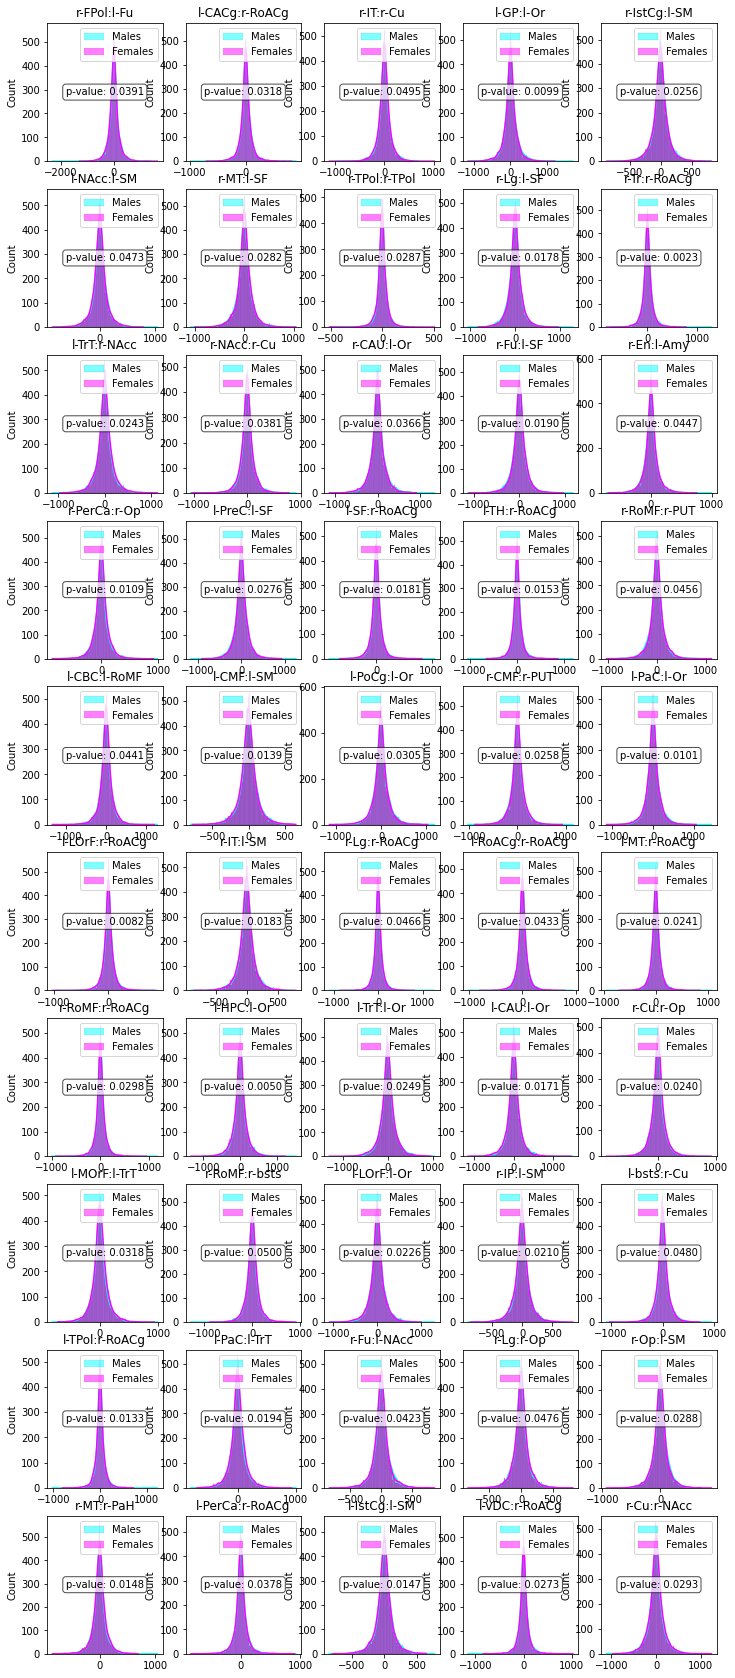

In [102]:
a = np.where(stat_diff == 1)
valid_diff_indices = [(x, y) for x, y in zip(a[0], a[1])]
log=0

control_M=np.reshape(males.values, (len(males.values), 87,87))
control_F=np.reshape(females.values, (len(females.values), 87,87))


if len(valid_diff_indices) > 100:
    valid_diff_indices = random.sample(valid_diff_indices, 50)

num_plots = len(valid_diff_indices)
num_cols = 5  # You can adjust the number of columns in the grid
num_rows = (num_plots + num_cols - 1) // num_cols

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))

for i, (x, y) in enumerate(valid_diff_indices):
    ax = axes.flatten()[i]

    # Create histograms
    if log:
        sns.histplot(control_M[:, x, y], kde=True, color='cyan', label='Males', log_scale=(True, False), ax=ax)
        sns.histplot(control_F[:, x, y], kde=True, color='magenta', label='Females', log_scale=(True, False), ax=ax)
    else:
        sns.histplot(control_M[:, x, y], kde=True, color='cyan', label='Males', log_scale=(False, False), ax=ax)
        sns.histplot(control_F[:, x, y], kde=True, color='magenta', label='Females', log_scale=(False, False), ax=ax)
    ax.set_title(f"{all_ROIsFC[x]}:{all_ROIsFC[y]}")
    ax.legend() 

    # # Stats
    # ttest=0
    # if ttest:
    #     _ , p_value = ttest_ind(control_M[:, x, y], control_F[:, x, y])
    # else:
    _ , p_value = mannwhitneyu(control_M[:, x, y], control_F[:, x, y])
    # p_value=diff[x,y]
    ax.annotate(f'p-value: {p_value:.4f}', xy=(0.5, 0.5), xycoords='axes fraction', ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

# Handedness

Text(0, 0.5, 'ROI #')

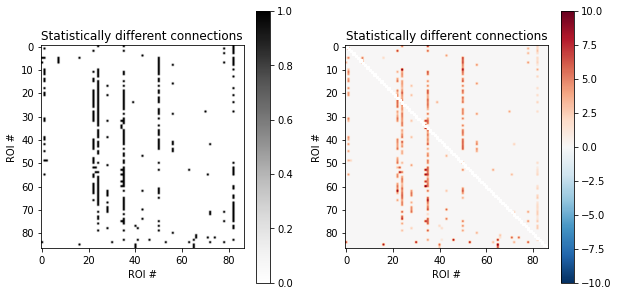

In [103]:
stat_diff = np.zeros(87 * 87)
ttest=0
median=0


t_statistics = np.zeros((np.shape(right)[1], 1))
p_values = np.zeros((np.shape(right)[1], 1))

for i in range(np.shape(right)[1]):
    # if ttest:
    #     t_statistics[i], p_values[i] = ttest_ind(
    #         right.values[:, i], left.values[:, i]
    #     )
    # else:
    t_statistics[i], p_values[i] = mannwhitneyu(right.values[:, i], left.values[:, i])

p = p_values.reshape((87 * 87))
stat_diff[np.where(p < 0.05)[0]] = 1

stat_diff = np.reshape(stat_diff, (87, 87))

if median:
    a = np.nanmedian(right, axis=0)
    b = np.nanmedian(left, axis=0)
else:
    a = np.nanmean(right, axis=0)
    b = np.nanmean(left, axis=0)

# diff = b - a
#left - right
diff = abs(b) - abs(a)
diff = np.reshape(diff, (87, 87))
diff[np.where(stat_diff == 0)] = 0

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(stat_diff, cmap="Greys")
plt.clim([0, 1])
plt.colorbar()
plt.title("Statistically different connections")
plt.xlabel("ROI #")
plt.ylabel("ROI #")
plt.subplot(122)
im = plt.imshow(diff, cmap="RdBu_r")
for i in range(len(diff)):
    im.axes.add_patch(
        plt.Rectangle((i - 0.5, i - 0.5), 1, 1, fill=True, color="w")
    )
plt.clim([-np.max(diff), np.max(diff)])
plt.colorbar()
plt.title("Statistically different connections")
plt.xlabel("ROI #")
plt.ylabel("ROI #")


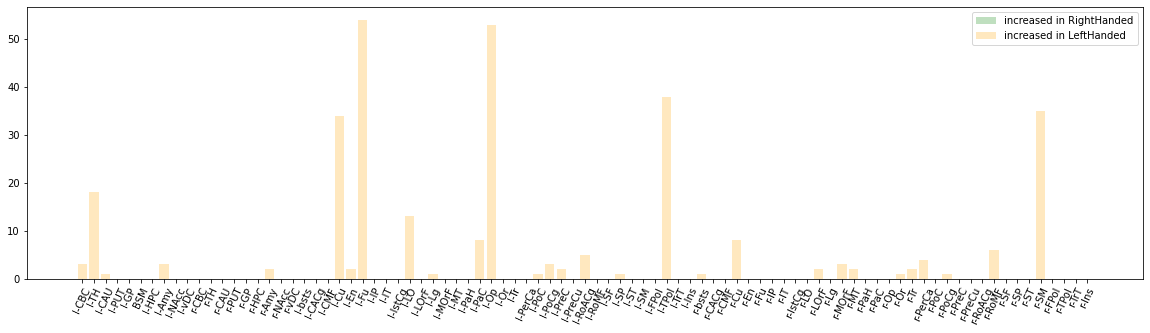

In [104]:
# the histograms shows how many connections from a certain area
# are stronger in right
# or left subjects

#left - right
fig, ax = plt.subplots(figsize = (20,5))
ax.bar(np.arange(87),np.sum(diff<0, axis=0), color='g', alpha = 0.25, label='increased in RightHanded')

ax.bar(np.arange(87),np.sum(diff>0, axis=0), color='orange',  alpha = 0.25, label='increased in LeftHanded')
ax.set_xticks(np.arange(0,87))
ax.set_xticklabels(all_ROIsFC, rotation=65)
# ax.set_title('Areas with connectivity increased in Females')
plt.legend()

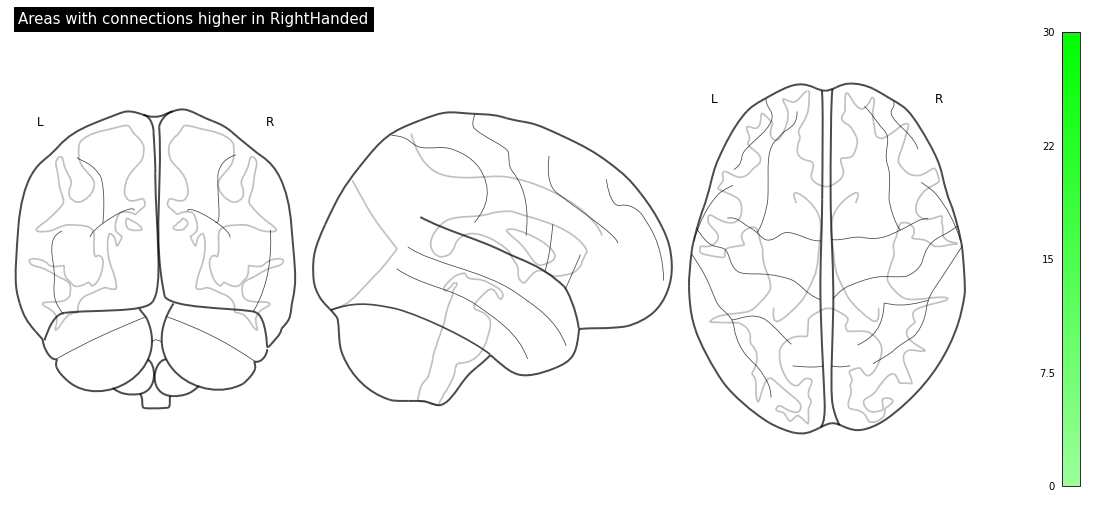

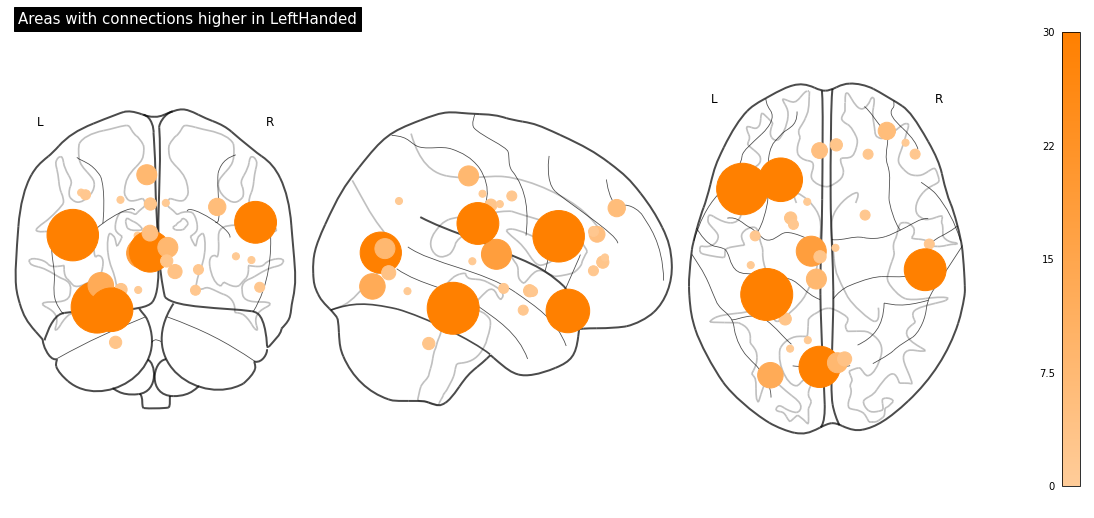

In [138]:
from nilearn import plotting
import numpy as np
import seaborn as sns

light_green = (0.6, 1.0, 0.6)
green = (0.0, 1.0, 0.0)

# Create a custom colormap
cmap = LinearSegmentedColormap.from_list("light_to_green", [light_green, green])

fig1=plt.figure(figsize=(15,7))
plotting.plot_markers(
    np.sum(diff<0, axis=0),
    coord_list,
    node_cmap=cmap,
    figure=fig1,
    # node_vmin=-2e-18,
    node_vmax=30,
    alpha=1,
    node_size=np.sum(diff<0, axis=0)*50,
    title="Areas with connections higher in RightHanded",
)

light_orange = (1.0, 0.8, 0.6)
orange = (1.0, 0.5, 0.0)

# Create a custom colormap
cmap = LinearSegmentedColormap.from_list("light_to_orange", [light_orange, orange])

fig2=plt.figure(figsize=(15,7))
plotting.plot_markers(
    np.sum(diff>0, axis=0),
    coord_list,
    node_cmap=cmap,
    figure=fig2,
    # node_vmin=-2e-18,
    node_vmax=30,
    alpha=1,
    node_size=np.sum(diff>0, axis=0)*50,
    title="Areas with connections higher in LeftHanded",
)


node_coords = coord_list[np.sum(diff>0, axis=0)>0]
# boolean_mask = 
node_names = [roi for roi, mask in zip(all_ROIsFC, (np.sum(diff > 0, axis=0) > 0)) if mask]
# Annotate node names

for coord, name in zip(node_coords, node_names):
    ax = fig2.axes[0] 
    ax.annotate(name, xy=(coord[0], coord[1]), xytext=(5, 5), textcoords='offset points', fontsize=12, color='black')


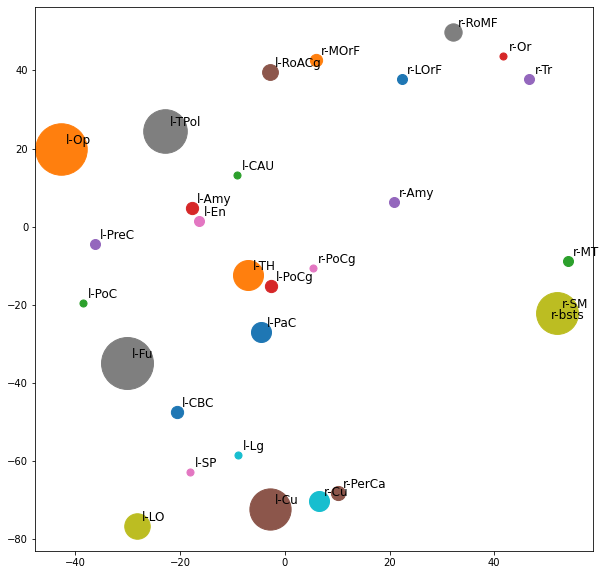

In [146]:
fig2=plt.figure(figsize=(10,10))

node_coords = coord_list[np.sum(diff>0, axis=0)>0]
node_sizes=np.sum(diff>0, axis=0)[np.sum(diff>0, axis=0)>0]
# boolean_mask = 
node_names = [roi for roi, mask in zip(all_ROIsFC, (np.sum(diff > 0, axis=0) > 0)) if mask]
# Annotate node names

for coord, name,si in zip(node_coords, node_names,node_sizes):
    plt.scatter(coord[0], coord[1], s=si*50)
    ax = fig2.axes[0] 
    ax.annotate(name, xy=(coord[0], coord[1]), xytext=(5, 5), textcoords='offset points', fontsize=12, color='black')

In [2]:
# Load labels for control/depressed

labels_file = '/cnl/abcd/data/labels/baseline_depr_sex_age_hand.csv' 
labels = pd.read_csv(labels_file, index_col = 0)
labels

sex  age hand  depress_dsm5
NDARINV08FUB58A   F  118    R             0
NDARINV04GAB2AA   F  130    R             0
NDARINV09AEBLZH   F  119    R             0
NDARINV0GZM9UZJ   F  118    R             0
NDARINV0N10CEEL   F  130    R             0
...              ..  ...  ...           ...
NDARINVXN6HMGK8   M  120    R             0
NDARINVXRP6TZGT   M  112    R             0
NDARINVXFVACT0F   M  110    R             0
NDARINVX718NUYK   M  120    R             0
NDARINVZG4U8G7X   M  111    R             0

[1430 rows x 4 columns]

In [10]:
# List all the available FC files
# file_name options can be: subc_Cov, subc_DDC, subc_Reg_DDC

fc_dir = '/cnl/abcd/data/imaging/fmri/rsfmri/interim/DDC/baseline/'
file_name = 'subc_Cov**.csv'

files = glob.glob(fc_dir+'**/'+file_name, recursive=True)

In [11]:
control=[]
depressed=[]

for f in files:

    # check if subject is part of our list
    if f.split('/')[-3].split('-')[-1] in labels.index.values:
    
        # check if subject is a control 0 or depressed 1
        if labels['depress_dsm5'].values[np.where(labels.index.values==f.split('/')[-3].split('-')[-1])]==0:
            fc = np.loadtxt(f, delimiter=",", dtype=float)
            control.append(fc)

        else:
            fc = np.loadtxt(f, delimiter=",", dtype=float)
            depressed.append(fc)

control=np.asarray(control)
depressed=np.asarray(depressed)

In [5]:
np.shape(control)

(1629, 98, 98)

From here on we use only controls but the same can be done with depressed

In [14]:
# Remove undesired areas (3rd and 4th ventricles, csf)

# Indices of rows and columns to remove
rows_to_remove = [9, 10, 14]
columns_to_remove = [9, 10, 14]

# Remove specified rows and columns
filtered_matrix = np.delete(control, rows_to_remove, axis=1)
filtered_matrix = np.delete(filtered_matrix, columns_to_remove, axis=2)

#connectivity matrices end up being 95*95 at this point
print(np.shape(filtered_matrix))

(303, 95, 95)


<IPython.core.display.Javascript object>


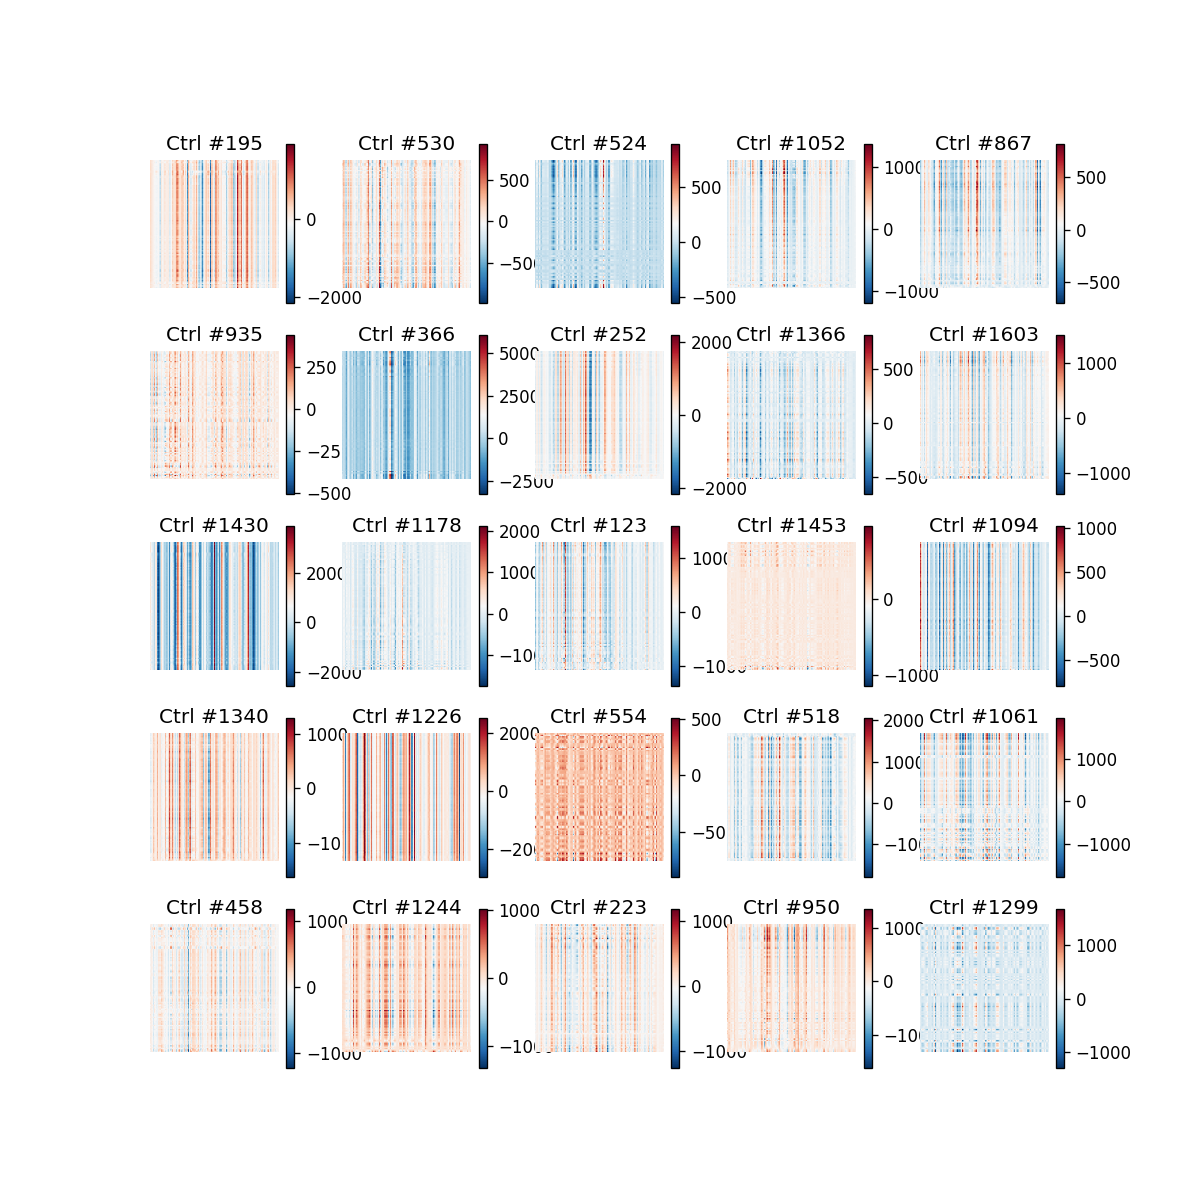

In [7]:
"""plot 25 random FC matrices"""
n = random.sample(range(len(filtered_matrix)), 25)

fig = plt.figure(figsize=(10, 10))

k = 0

for i in n:
    ax = fig.add_subplot(5, 5, k + 1)
    plt.imshow(filtered_matrix[i, :, :], cmap="RdBu_r")

    plt.colorbar()
    plt.title(f"Ctrl #{i}")

    plt.axis("off")
    k = k + 1

<IPython.core.display.Javascript object>


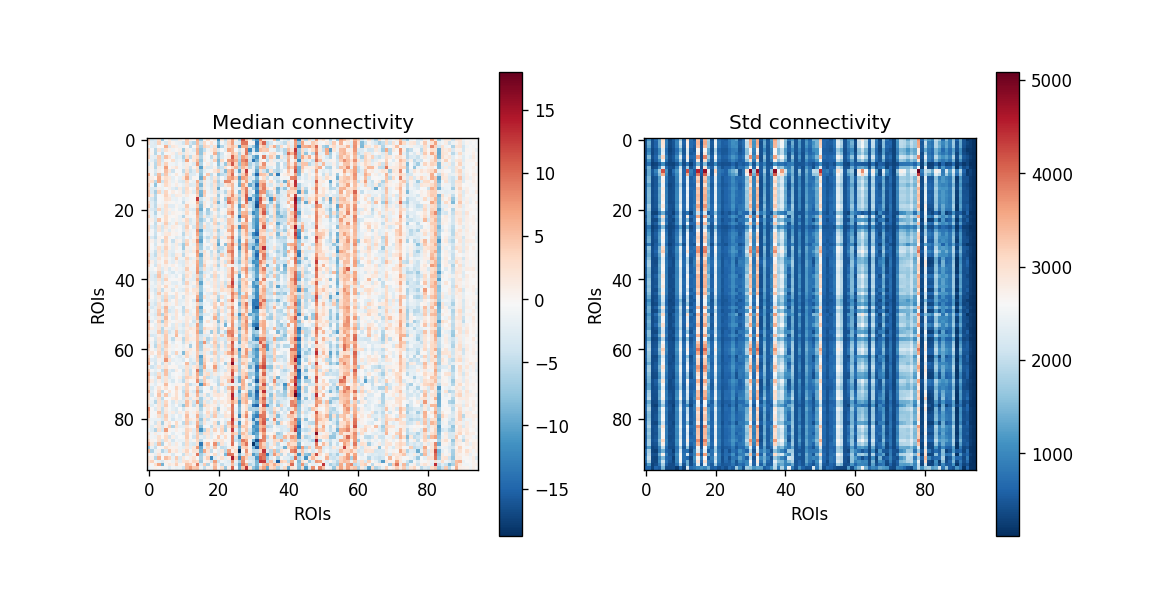

In [8]:
# Visualize the mean/median and std connectivity matrix for controls

plt.figure()
plt.subplot(121)
plt.imshow(np.nanmedian(filtered_matrix,axis=0), cmap="RdBu_r")
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.title('Median connectivity')
plt.colorbar()
plt.subplot(122)
plt.imshow(np.nanstd(filtered_matrix,axis=0), cmap="RdBu_r")
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.title('Std connectivity')
plt.colorbar()


<IPython.core.display.Javascript object>


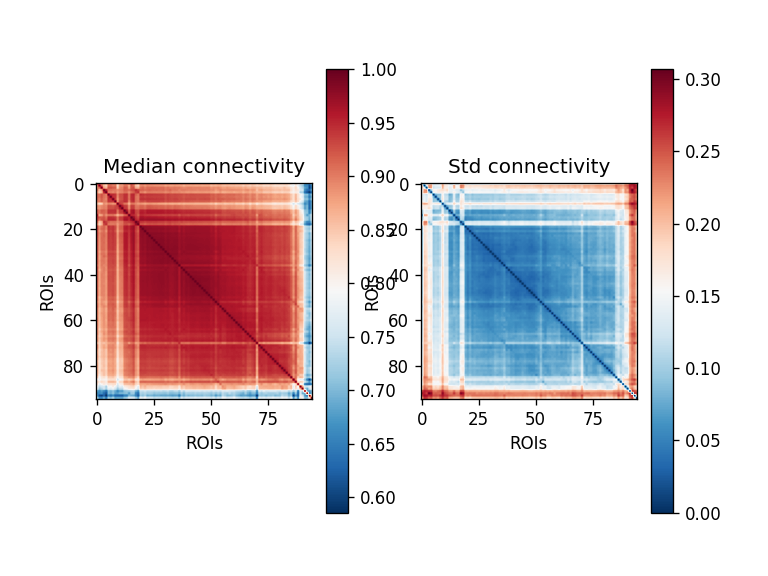

In [13]:
# Visualize the mean/median and std connectivity matrix for controls

plt.figure()
plt.subplot(121)
plt.imshow(np.nanmedian(filtered_matrix,axis=0), cmap="RdBu_r")
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.title('Median connectivity')
plt.colorbar()
plt.subplot(122)
plt.imshow(np.nanstd(filtered_matrix,axis=0), cmap="RdBu_r")
plt.xlabel('ROIs')
plt.ylabel('ROIs')
plt.title('Std connectivity')
plt.colorbar()


<IPython.core.display.Javascript object>


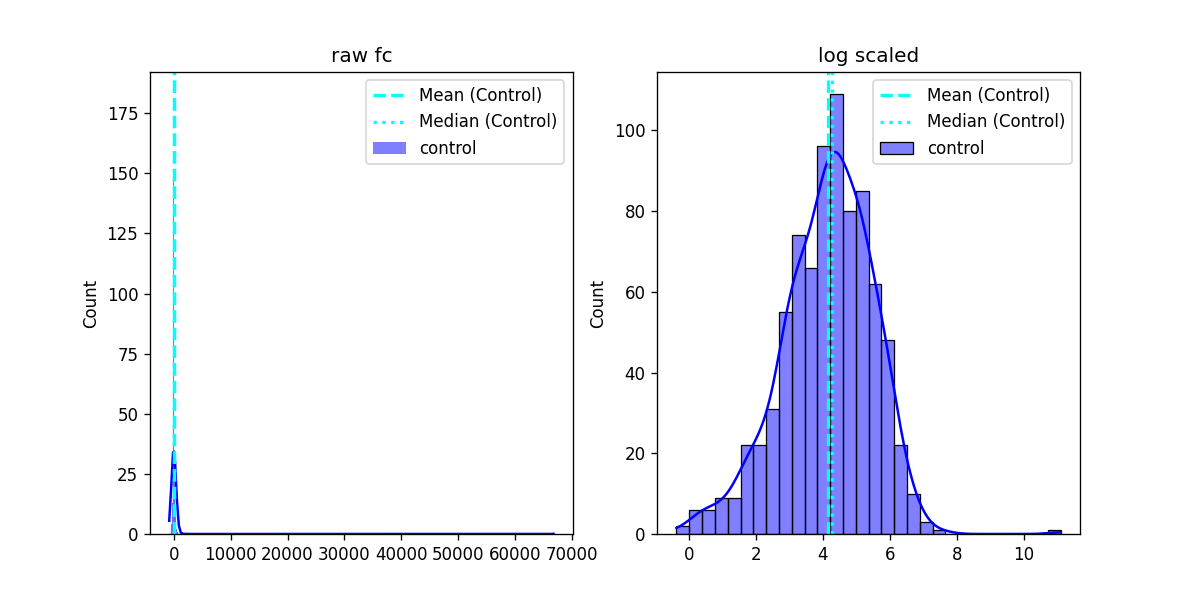

/tmp/ipykernel_85870/3343351461.py:22: RuntimeWarning: invalid value encountered in log
  sns.histplot( np.log(filtered_matrix[:, x, y]), kde=True, color='blue', label='control')
/tmp/ipykernel_85870/3343351461.py:24: RuntimeWarning: invalid value encountered in log
  mean_c = np.nanmean(np.log(filtered_matrix[:, x, y]))
/tmp/ipykernel_85870/3343351461.py:25: RuntimeWarning: invalid value encountered in log
  median_c = np.nanmedian(np.log(filtered_matrix[:, x, y]))


In [9]:
# Visualize probability distributions of specific connections x,y

#chose the connection to visualize
x=40
y=88

plt.figure(figsize=(10, 5))
plt.subplot(121)
sns.histplot( filtered_matrix[:, x, y], kde=True, color='blue', label='control', log_scale=(False, False))

# Add mean and median vertical bars
mean_c = np.nanmean(filtered_matrix[:, x, y])
median_c = np.nanmedian(filtered_matrix[:, x, y])

plt.axvline(x=mean_c, color='cyan', linestyle='dashed', linewidth=2, label='Mean (Control)')
plt.axvline(x=median_c, color='cyan', linestyle='dotted', linewidth=2, label='Median (Control)')

plt.title('raw fc')
plt.legend()

plt.subplot(122)
sns.histplot( np.log(filtered_matrix[:, x, y]), kde=True, color='blue', label='control')

mean_c = np.nanmean(np.log(filtered_matrix[:, x, y]))
median_c = np.nanmedian(np.log(filtered_matrix[:, x, y]))

plt.axvline(x=mean_c, color='cyan', linestyle='dashed', linewidth=2, label='Mean (Control)')
plt.axvline(x=median_c, color='cyan', linestyle='dotted', linewidth=2, label='Median (Control)')

plt.title('log scaled')
plt.legend()

In [66]:
# Conver the matrices to arrays for ML = "flattening"

flattened_array = filtered_matrix.reshape(filtered_matrix.shape[0],-1)
print(np.shape(flattened_array))


(3780, 9025)


In [ ]:
# SUBTYPING!!!